# Importando librerías

In [1]:
import cv2 

img = cv2.imread('D:/flores/flores2/train/iris/15020790_f8aaf8850b_c.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

32 32 3 3


In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargas set de imagénes

In [4]:
dirname = os.path.join(os.getcwd(),'D:/flores/flores2/train')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  D:/flores/flores2/train\
D:/flores/flores2/train\astilbe 1
D:/flores/flores2/train\bellflower 5384
D:/flores/flores2/train\iris 6536
D:/flores/flores2/train\rose 8304
D:/flores/flores2/train\Rudbeckia_hirta 7864
Directorios leidos: 5
Imagenes en cada directorio [5385, 6536, 8304, 7864, 7871]
suma Total de imagenes en subdirs: 35960


# Creamos etiquetas

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  35960


In [6]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 astilbe
1 bellflower
2 iris
3 rose
4 Rudbeckia_hirta


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8)



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (28768, 32, 32, 3) (28768,)
Testing data shape :  (7192, 32, 32, 3) (7192,)


Text(0.5, 1.0, 'Ground Truth : 3')

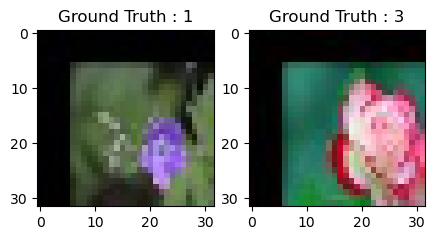

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

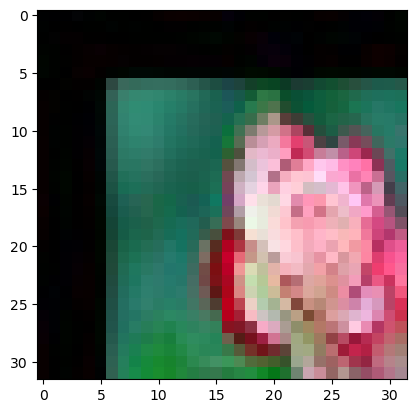

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(23014, 32, 32, 3) (5754, 32, 32, 3) (23014, 5) (5754, 5)


# Creamos el modelo de CNN

In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 100 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
flower_model = Sequential()
flower_model.add(Conv2D(64, kernel_size=(5, 5),activation='linear',padding='same',input_shape=(32,32,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(64, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))


In [16]:
flower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 64)                1048640   
                                                        

# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [44]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/100
720/720 [==============================] - 15s 20ms/step - loss: 0.3462 - accuracy: 0.8703 - val_loss: 0.3244 - val_accuracy: 0.8743
Epoch 2/100
720/720 [==============================] - 15s 20ms/step - loss: 0.3477 - accuracy: 0.8707 - val_loss: 0.3358 - val_accuracy: 0.8730
Epoch 3/100
720/720 [==============================] - 15s 21ms/step - loss: 0.3430 - accuracy: 0.8724 - val_loss: 0.3206 - val_accuracy: 0.8794
Epoch 4/100
720/720 [==============================] - 15s 21ms/step - loss: 0.3433 - accuracy: 0.8702 - val_loss: 0.3266 - val_accuracy: 0.8743
Epoch 5/100
720/720 [==============================] - 15s 20ms/step - loss: 0.3403 - accuracy: 0.8739 - val_loss: 0.3179 - val_accuracy: 0.8766
Epoch 6/100
720/720 [==============================] - 15s 21ms/step - loss: 0.3396 - accuracy: 0.8712 - val_loss: 0.3477 - val_accuracy: 0.8691
Epoch 7/100
720/720 [==============================] - 15s 21ms/step - loss: 0.3374 - accuracy: 0.8769 - val_loss: 0.3335 - val_ac

# Evaluamos la red

In [56]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

225/225 [==============================] - 1s 5ms/step - loss: 0.2541 - accuracy: 0.9050


In [57]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2540662884712219
Test accuracy: 0.9050333499908447


## Guardamos modelo con mejor accuracy

In [53]:
model2.save("./flor_model90.h5py")

INFO:tensorflow:Assets written to: ./flor_model90.h5py\assets


INFO:tensorflow:Assets written to: ./flor_model90.h5py\assets


In [22]:
flower_train.history

{'loss': [1.4068176746368408,
  1.137017846107483,
  1.0302128791809082,
  0.9744313359260559,
  0.9347913861274719,
  0.9055149555206299,
  0.881992757320404,
  0.8624350428581238,
  0.842716634273529,
  0.8284859657287598,
  0.8140967488288879,
  0.8017163872718811,
  0.785398542881012,
  0.7783362865447998,
  0.7684712409973145,
  0.7548230886459351,
  0.7482486963272095,
  0.737169086933136,
  0.7299250364303589,
  0.7179397940635681,
  0.7185838222503662,
  0.7036324143409729,
  0.7009564638137817,
  0.6949666738510132,
  0.6864587664604187,
  0.6827781200408936,
  0.6776393055915833,
  0.6730180382728577,
  0.6684357523918152,
  0.6643427014350891,
  0.6570882797241211,
  0.6585376858711243,
  0.6520379185676575,
  0.6454042792320251,
  0.6452099084854126,
  0.635205864906311,
  0.6341949105262756,
  0.6337352395057678,
  0.6302808523178101,
  0.6236746311187744,
  0.6227500438690186,
  0.616901695728302,
  0.6168984174728394,
  0.614061176776886,
  0.6060765385627747,
  0.607117

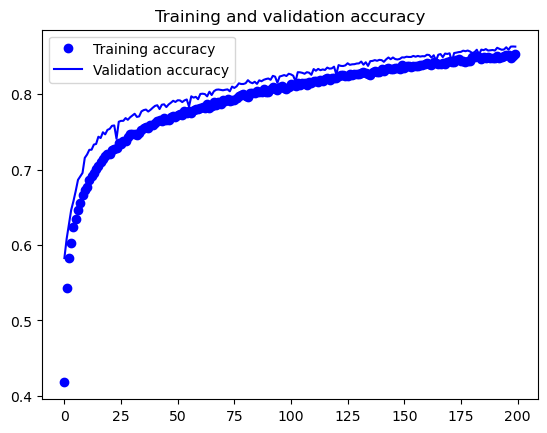

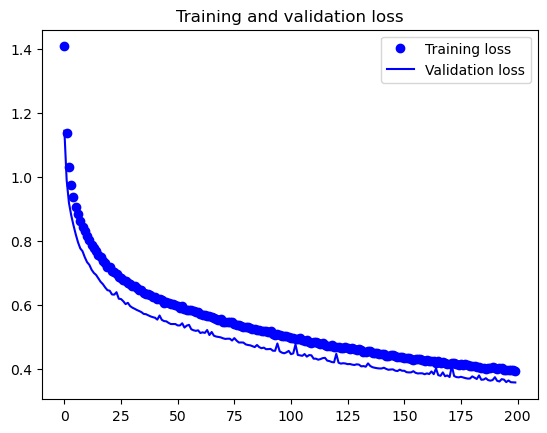

In [47]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
predicted_classes2 = model2.predict(test_X)

225/225 [==============================] - 1s 5ms/step


In [49]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [50]:
predicted_classes.shape, test_Y.shape

((7192,), (7192,))

# Aprendamos de los errores: Qué mejorar

Found 6509 correct labels


C:\Users\sego2\AppData\Local\Temp\ipykernel_18264\575148169.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


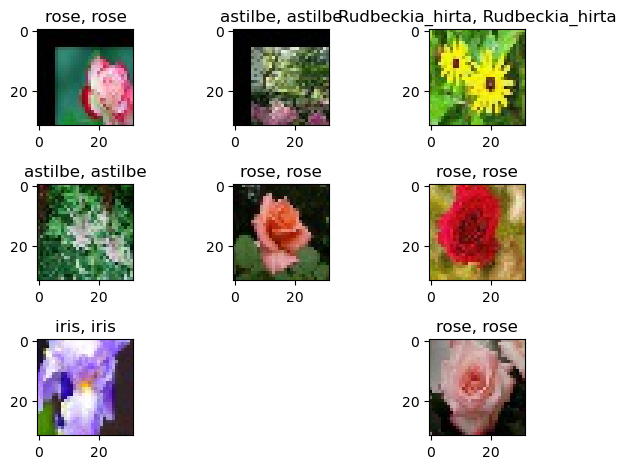

In [51]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))

    plt.tight_layout()

Found 683 incorrect labels


C:\Users\sego2\AppData\Local\Temp\ipykernel_18264\3178627398.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


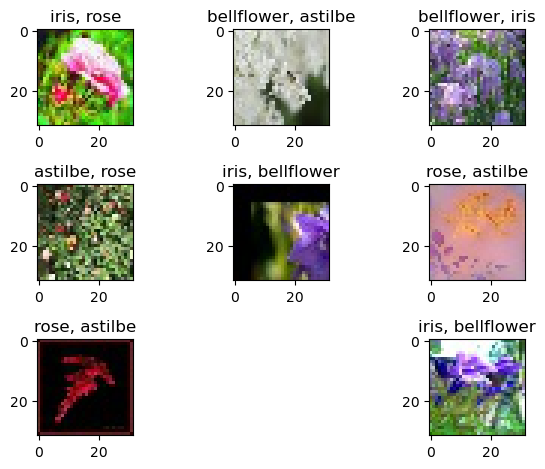

In [52]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()